In [18]:
import numpy as np
import pandas as pd

In [25]:
data_frame = pd.read_csv('spam.csv')

In [26]:
data_frame.sample(5)

,Category,Message
5489,ham,Oh thanks a lot..i already bought 2 eggs ..
480,ham,When're you guys getting back? G said you were...
5004,spam,CDs 4u: Congratulations ur awarded £500 of CD ...
876,spam,"Shop till u Drop, IS IT YOU, either 10K, 5K, £..."
4162,spam,Had your mobile 11 months or more? U R entitle...


In [27]:
data_frame.sample(10)

,Category,Message
133,ham,First answer my question.
5312,ham,Here got ur favorite oyster... N got my favori...
2622,ham,Lol! Nah wasn't too bad thanks. Its good to b ...
1729,ham,As per your request 'Maangalyam (Alaipayuthe)'...
1837,ham,Are you wet right now?
1974,ham,I had askd u a question some hours before. Its...
1614,ham,Thnx dude. u guys out 2nite?
5152,ham,Idk. I'm sitting here in a stop and shop parki...
4935,ham,Hey do you want anything to buy:)
940,ham,Better. Made up for Friday and stuffed myself ...


In [28]:
# 1.Data Cleaning
# 2.EDA(Analysis of DATA)
# 3.Text Preprocessing (NLP)
# 4.Model building
# 5.Evaluation
# 6.Improvement(If Possible)
# 7.Website Creation
# 8.Deployment

# 1.DATA CLEANING

In [29]:
data_frame.info

<bound method DataFrame.info of      Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [30]:
# Since No Non-null values are there,Otherwise we have to use df.drop(columns=['col_name','col_name2'],....],inplace=True)
data_frame.rename(columns={'Category':'target','Message':'text'},inplace = True) 
data_frame.sample(7)

,target,text
1828,ham,Hey gorgeous man. My work mobile number is. Ha...
167,spam,URGENT! We are trying to contact you. Last wee...
1393,ham,"Thk shld b can... Ya, i wana go 4 lessons... H..."
3084,ham,K..k:)how about your training process?
2341,ham,I will take care of financial problem.i will h...
2529,ham,jay says he'll put in &lt;#&gt;
4167,ham,Well if I'm that desperate I'll just call arma...


In [31]:
# Now we shall transform ham = 0 and spam =1 using encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data_frame['target'] = encoder.fit_transform(data_frame['target'])
data_frame.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [32]:
#Now we shall check the duplicate values and null/missing values and remove
data_frame.isnull().sum()


target    0
text      0
dtype: int64

In [33]:
data_frame.duplicated().sum()

415

In [34]:
# Removing Duplicate Values:
data_frame = data_frame.drop_duplicates(keep='first')
data_frame.duplicated().sum()

0

In [35]:
data_frame.shape

(5157, 2)

# 2.EDA

In [36]:
#EDA stands for Exploratory Data Analysis it is basically used for understanding the data
data_frame.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
data_frame['target'].value_counts()

0    4516
1     641
Name: target, dtype: int64

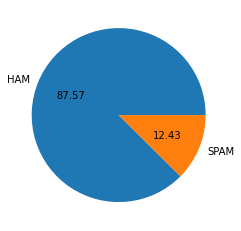

In [38]:
#We saw above that in the above data frame we have more HAM mails compared to the SPAM mails
import matplotlib.pyplot as plot
plot.pie(data_frame['target'].value_counts(), labels=['HAM','SPAM'], autopct="%0.2f")
plot.show()

In [39]:
# Analysing number of characters,word and sentences in the Emails using NLTK(Natural Language Tool KIt)
!pip install nltk

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\ATULYA
[nltk_data]     DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
#Creating a column for counting number of characters in the data frame
data_frame['no_of_Characters']=data_frame['text'].apply(len)
#data_frame.drop(columns=['no_of_characters'], inplace=True)
data_frame.head()

C:\Users\ATULYA~1\AppData\Local\Temp/ipykernel_9460/1435050855.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['no_of_Characters']=data_frame['text'].apply(len)


,target,text,no_of_Characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [42]:
#Creating a column for counting number of words in the data frame this is called Tokenizing in NLP
data_frame['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5157, dtype: int64

In [43]:
# No. of Words
data_frame['no_of_Words']=data_frame['text'].apply(lambda x:len(nltk.word_tokenize(x)))
data_frame.head()

C:\Users\ATULYA~1\AppData\Local\Temp/ipykernel_9460/2010494480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['no_of_Words']=data_frame['text'].apply(lambda x:len(nltk.word_tokenize(x)))


,target,text,no_of_Characters,no_of_Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [44]:
# Dividing the text into small sentences using NLTK
data_frame['text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568               [Will ü b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5157, dtype: object

In [46]:
#  Adding No. of sentences columns
data_frame['no_of_Sentences'] = data_frame['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
#data_frame.drop(columns=['no_of Sentences'], inplace=True)
data_frame.head()

C:\Users\ATULYA~1\AppData\Local\Temp/ipykernel_9460/2120785915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['no_of_Sentences'] = data_frame['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


,target,text,no_of_Characters,no_of_Words,no_of_Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [47]:
# Checking tokens for: HAM
data_frame[data_frame['target'] == 0][['no_of_Characters','no_of_Words','no_of_Sentences']].describe()

,no_of_Characters,no_of_Words,no_of_Sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267272,1.822852
std,56.708301,13.585433,1.374848
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [48]:
# Checking tokens for: SPAM
data_frame[data_frame['target'] == 1][['no_of_Characters','no_of_Words','no_of_Sentences']].describe()

,no_of_Characters,no_of_Words,no_of_Sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.968799
std,30.399707,7.103501,1.486069
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [49]:
# Checking the data in static data visualisation ie Seaborn
import seaborn as sns

<AxesSubplot:xlabel='no_of_Characters', ylabel='Count'>

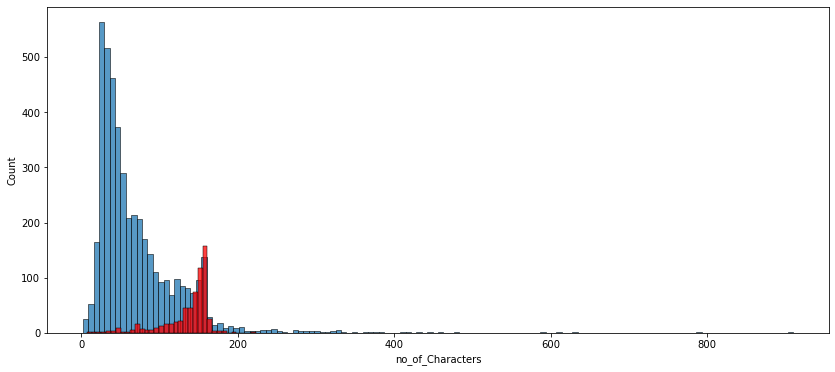

In [50]:
plot.figure(figsize=(14,6))
sns.histplot(data_frame[data_frame['target'] == 0]['no_of_Characters'])
sns.histplot(data_frame[data_frame['target'] == 1]['no_of_Characters'], color = 'red')

In [51]:
# We can clearly see that most of the HAM messages have less characters then SPAM messages

In [52]:
# Now we shall check the corelation b/w the word,charaters and sentences
data_frame.corr

<bound method DataFrame.corr of       target                                               text  \
0          0  Go until jurong point, crazy.. Available only ...   
1          0                      Ok lar... Joking wif u oni...   
2          1  Free entry in 2 a wkly comp to win FA Cup fina...   
3          0  U dun say so early hor... U c already then say...   
4          0  Nah I don't think he goes to usf, he lives aro...   
...      ...                                                ...   
5567       1  This is the 2nd time we have tried 2 contact u...   
5568       0               Will ü b going to esplanade fr home?   
5569       0  Pity, * was in mood for that. So...any other s...   
5570       0  The guy did some bitching but I acted like i'd...   
5571       0                         Rofl. Its true to its name   

      no_of_Characters  no_of_Words  no_of_Sentences  
0                  111           24                2  
1                   29            8                2 

<AxesSubplot:>

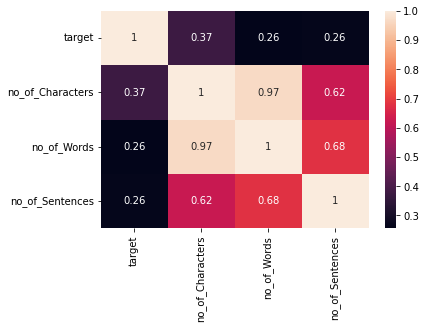

In [53]:
sns.heatmap(data_frame.corr(),annot=True)

In [54]:
#So if we increse the no.of.characters their is a high chance of getting target = 1 which is spam
# Since the co-relation are high so we shall take no_of_Character column

# 3.Data Preprocessing
-> Converting data to lower case
-> Tokenization
-> Removing special characters
-> Removing stop word
-> Stemming(means taking the  main word)

In [55]:
# Converting the text in lower case and removing the alpha-numeric words if present
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]  # cloning
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [56]:
#transform_text("Hello Machine Learining I am %24% @ Atulya")
transform_text("Hi are you talking?!")

'hi talk'

In [57]:
# In the above we performed -> Converting data to lower case -> Tokenization -> Removing special characters

In [58]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\ATULYA
[nltk_data]     DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
# Stopword are the word which doesn't provide meaning to the sentence but helps in the formation
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [60]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [61]:
transform_text("Hi Atulya how are you?!")

'hi atulya'

In [62]:
transform_text("Did you complete your project?")

'complet project'

In [63]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("DANCING")

'danc'

In [64]:
ps.stem("talking")

'talk'

In [65]:
ps.stem("talked")

'talk'

In [66]:
data_frame['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [67]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [68]:
data_frame['Transformed_text'] = data_frame['text'].apply(transform_text)
data_frame.head()

C:\Users\ATULYA~1\AppData\Local\Temp/ipykernel_9460/1085995229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['Transformed_text'] = data_frame['text'].apply(transform_text)


,target,text,no_of_Characters,no_of_Words,no_of_Sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [69]:
# Generating Word Cloud

from wordcloud import WordCloud
wc = WordCloud(width = 1000,height = 600,min_font_size=10,background_color='black')

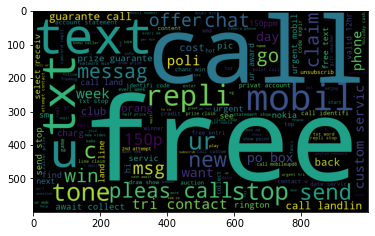

In [70]:
spam_word_cloud = wc.generate(data_frame[data_frame['target'] == 1]['Transformed_text'].str.cat(sep=" "))
plot.imshow(spam_word_cloud)

In [71]:
data_frame.rename(columns={'Transformed_test':'Transformed_text'},inplace = True)

C:\Users\ATULYA DELL\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


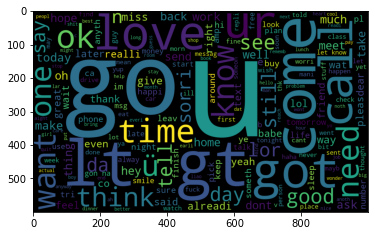

In [72]:
ham_word_cloud = wc.generate(data_frame[data_frame['target'] == 0]['Transformed_text'].str.cat(sep=" "))
plot.imshow(ham_word_cloud)

In [73]:
spam_corpus = []
for msg in data_frame[data_frame['target'] == 1]['Transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

len(spam_corpus)

9781

In [74]:
# we are showing top 20 spam words
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(20))

,0,1
0,call,311
1,free,186
2,2,154
3,txt,139
4,text,122
5,ur,119
6,u,115
7,mobil,110
8,stop,108
9,repli,103


C:\Users\ATULYA DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


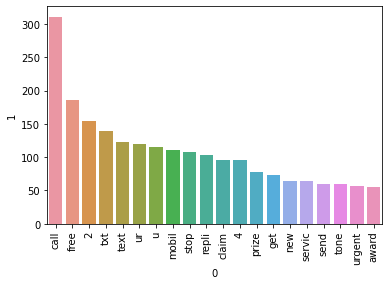

In [75]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(20))[0],pd.DataFrame(Counter(spam_corpus).most_common(20))[1])
plot.xticks(rotation='vertical')
plot.show()

In [76]:
ham_corpus = []
for msg in data_frame[data_frame['target'] == 0]['Transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(ham_corpus)

35938

In [77]:
# Top 20 Ham words
pd.DataFrame(Counter(ham_corpus).most_common(20))

,0,1
0,u,897
1,go,407
2,get,351
3,2,288
4,gt,288
5,lt,287
6,come,278
7,got,239
8,know,237
9,like,236


C:\Users\ATULYA DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


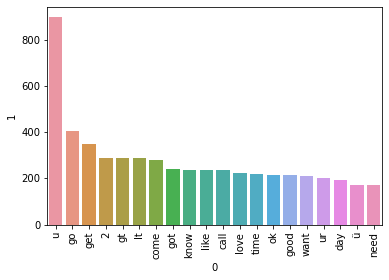

In [78]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(20))[0],pd.DataFrame(Counter(ham_corpus).most_common(20))[1])
plot.xticks(rotation='vertical')
plot.show()

# 4.Model Building

In [79]:
# we will try to build a model with precision = 100%
# We shall use TFidf Vertorizor
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# cv = CountVectorizer()
tfidf = TfidfVectorizer()
X  = tfidf.fit_transform(data_frame['Transformed_text']).toarray()

In [80]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [81]:
X.shape

(5157, 6781)

In [82]:
Y = data_frame['target'].values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 2)

In [85]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [86]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [87]:
gnb.fit(X_train,Y_train)
Y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))


0.8691860465116279
[[787 118]
 [ 17 110]]
0.4824561403508772


In [88]:
mnb.fit(X_train,Y_train)
Y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))


0.9612403100775194
[[905   0]
 [ 40  87]]
1.0


In [89]:
bnb.fit(X_train,Y_train)
Y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))


0.9718992248062015
[[902   3]
 [ 26 101]]
0.9711538461538461


In [90]:
#  Since mnb is not giving any False positives (ie No Error) also we were looking for 100 % percession 
#  so we will go with Mutinomial Naive Base MOdel

In [91]:
import pickle
pickle.dump(tfidf,open('vectorizer1.pkl', 'wb'))
pickle.dump(mnb,open('model1.pkl', 'wb'))

In [98]:
msgg = input("Enter the message" )
transform_email = transform_text(msgg)
vector_input = tfidf.transform([transform_email])
result = mnb.predict(vector_input)[0]

if result == 1:
        print("Spam")
else:
        print("Not Spam")



Enter the messageWin INR 5L worth scholarship, cash rewards & more through competitions; DTU hosts hackathon
Not Spam
